In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
from resnet import Resnet50

In [5]:
tf.__version__

'2.5.0'

## Fashion MNIST Dataset

In [6]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images = np.expand_dims(train_images, axis = 3)
test_images = np.expand_dims(test_images, axis = 3)

train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes=len(CLASS_NAMES))
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes=len(CLASS_NAMES))

In [9]:
train_images.shape

(60000, 28, 28, 1)

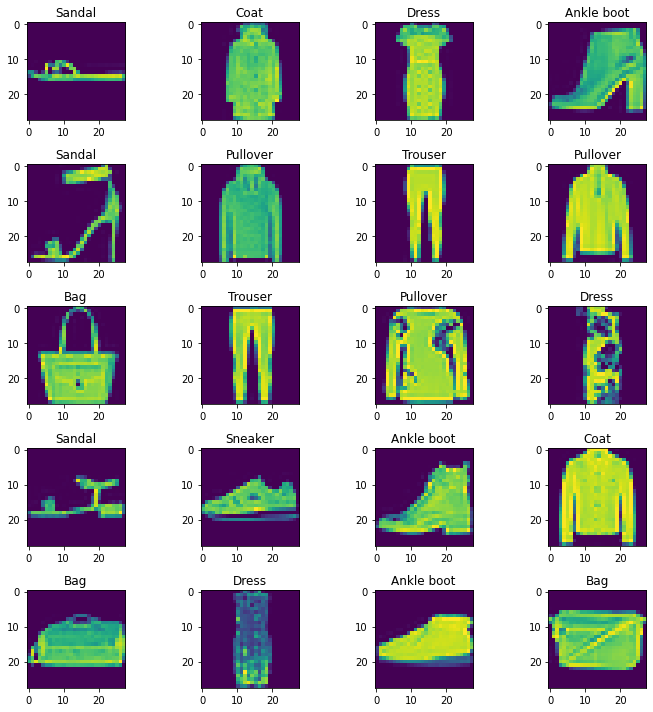

In [10]:
SAMPLE_SIZE = 20
samples = np.random.randint(0, len(train_images), size = SAMPLE_SIZE)

fig, axarr = plt.subplots(SAMPLE_SIZE//4,4, figsize = (10,10))
axs = axarr.ravel()

for idx, sample in enumerate(samples):
    axs[idx].imshow(train_images[sample,:,:])
    axs[idx].set_title(CLASS_NAMES[train_labels[sample]])
    
plt.tight_layout()

## Test Resnet 50

In [11]:
resnet50 = Resnet50(len(CLASS_NAMES))

In [12]:
input_layer = layers.Input(shape = train_images.shape[1:])
output_layer = resnet50(input_layer)
model = models.Model(inputs = input_layer, outputs = output_layer)

2021-08-12 17:52:01.001540: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer='adam',
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

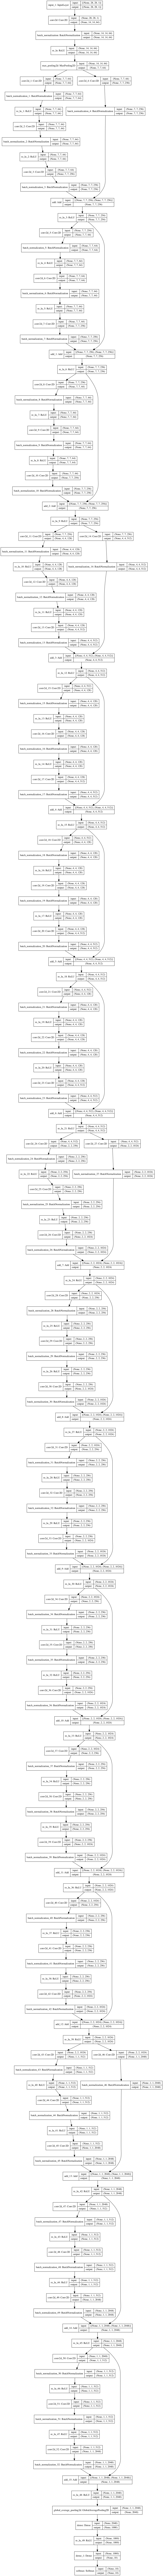

In [14]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [15]:
model.fit(x = train_images, y = train_labels_onehot, validation_split=0.20, verbose=1,epochs = 1)

2021-08-12 17:52:04.533359: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


1500/1500 [==============================] - 1684s 1s/step - loss: 0.6748 - accuracy: 0.7784 - val_loss: 0.4464 - val_accuracy: 0.8429


## Evaluate Resnet50

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 17s - loss: 0.4540 - accuracy: 0.8381

Test accuracy: 0.838100016117096
